Testing two populations with different distribution

Here we will assume that two test A and B resulted in a different probability distribution, which means two tests are not correlated.
We will create two mock data A and B that follows two different probability distribution, and then use various tests to see whether we can determine that two datasets follow different distribution

In [14]:
import numpy as np
import pandas as pd
# 1. Create two mock data with different prob
np.random.seed(0)
Ax = np.random.normal(2,0.3,100)
Bx = np.random.normal(4,1.5,100)
x = data['x']
d1=pd.DataFrame({'g':'A', 'x':Ax})
d2 = pd.DataFrame({'g':'B', 'x' : Bx})
data = pd.concat([d1, d2])

In [13]:
data.groupby('g').x.describe()

,count,mean,std,min,25%,50%,75%,max
g,,,,,,,,
A,100.0,2.017942,0.303888,1.234103,1.806843,2.028229,2.221123,2.680926
B,100.0,4.123019,1.559819,0.664895,2.881855,4.036982,5.271220,7.574717


In [16]:
#normality testing
# this 
from scipy import stats
stats.shapiro(x) # Shapiro test gives statistic & pvalue
# if the pvalue is larger than 0.05, the data accepts null hypothesis,
# which is the data has gaussian distribution. Since pvalue for data is much smaller than 0.05,
# we can find out that the distribution is not gaussian

ShapiroResult(statistic=0.8438779002027703, pvalue=2.1902281636615102e-13)

In [17]:
# Levene Test : Normality isn't satistied
stats.levene(d1.x, d2.x)
# since the pvalue is much smaller than 0.05, we can infer that two distribution A, B
# doesn't have the same variance.

LeveneResult(statistic=161.37601839530603, pvalue=1.9714363759998126e-27)

In [24]:
from statsmodels.stats.weightstats import ttest_ind
ttest_ind(d1.x, d2.x, alternative='smaller', usevar='unequal')
# statistics on whether two distributions have different mean, assuming different variances
# this is also called Welch's t-test
# since p-value is much smaller than 0.05, two distribution has different mean with different variances.

(-13.246596388961319, 1.4768803753208418e-24, 106.50444127861473)

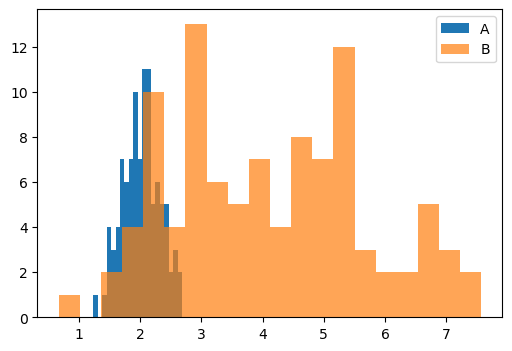

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4)) # histogram of data, you can clearly see the mean and variance of
# each datasets are different

plt.hist(data[data['g']=='A']['x'], bins=20, label='A')
plt.hist(data[data['g']=='B']['x'], bins=20, label='B', alpha=0.7)
plt.legend()